In [2]:
# install dependencies
! pip3 install seaborn


[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [3]:
# import libraries and read data

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv("diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 1-1: Preprocessing

In [4]:
# we'll drop useless columns

data = data.drop('Unnamed: 0', axis=1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
# check if there is any null value in the data
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
set(data['cut'])

{'Fair', 'Good', 'Ideal', 'Premium', 'Very Good'}

In [7]:
set(data['color'])

{'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [8]:
set(data['clarity'])

{'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'}

I: Included

VVS: Very Very Slightly Included

SI: Slightly Included

IF: Internally flawless

In [9]:
cut_to_int = { 
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

clarity_levels = ['I1', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2', 'IF']
clarity_to_int = { clarity_levels[i]: i+1 for i in range(0, len(clarity_levels)) }
print(clarity_to_int)

{'I1': 1, 'SI1': 2, 'SI2': 3, 'VS1': 4, 'VS2': 5, 'VVS1': 6, 'VVS2': 7, 'IF': 8}


In [10]:
data['cut'] = data['cut'].apply(cut_to_int.get)
data['clarity'] = data['clarity'].apply(clarity_to_int.get)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,E,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,D,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,D,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,D,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,H,3,61.0,58.0,2757,6.15,6.12,3.74


In [11]:
# drop useless columns

data['xy'] = data[['x', 'y']].max(axis=1)
data = data.drop(columns=['x','y'])
data.head()

,carat,cut,color,clarity,depth,table,price,z,xy
0,0.23,5,E,3,61.5,55.0,326,2.43,3.98
1,0.21,4,E,2,59.8,61.0,326,2.31,3.89
2,0.23,2,E,4,56.9,65.0,327,2.31,4.07
3,0.29,4,I,5,62.4,58.0,334,2.63,4.23
4,0.31,2,J,3,63.3,58.0,335,2.75,4.35


replace categorical columns with numerical

In [12]:
data = pd.get_dummies(data)
data.head()

,carat,cut,clarity,depth,table,price,z,xy,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,5,3,61.5,55.0,326,2.43,3.98,0,1,0,0,0,0,0
1,0.21,4,2,59.8,61.0,326,2.31,3.89,0,1,0,0,0,0,0
2,0.23,2,4,56.9,65.0,327,2.31,4.07,0,1,0,0,0,0,0
3,0.29,4,5,62.4,58.0,334,2.63,4.23,0,0,0,0,0,1,0
4,0.31,2,3,63.3,58.0,335,2.75,4.35,0,0,0,0,0,0,1


# 1-2

Correlation map between columns

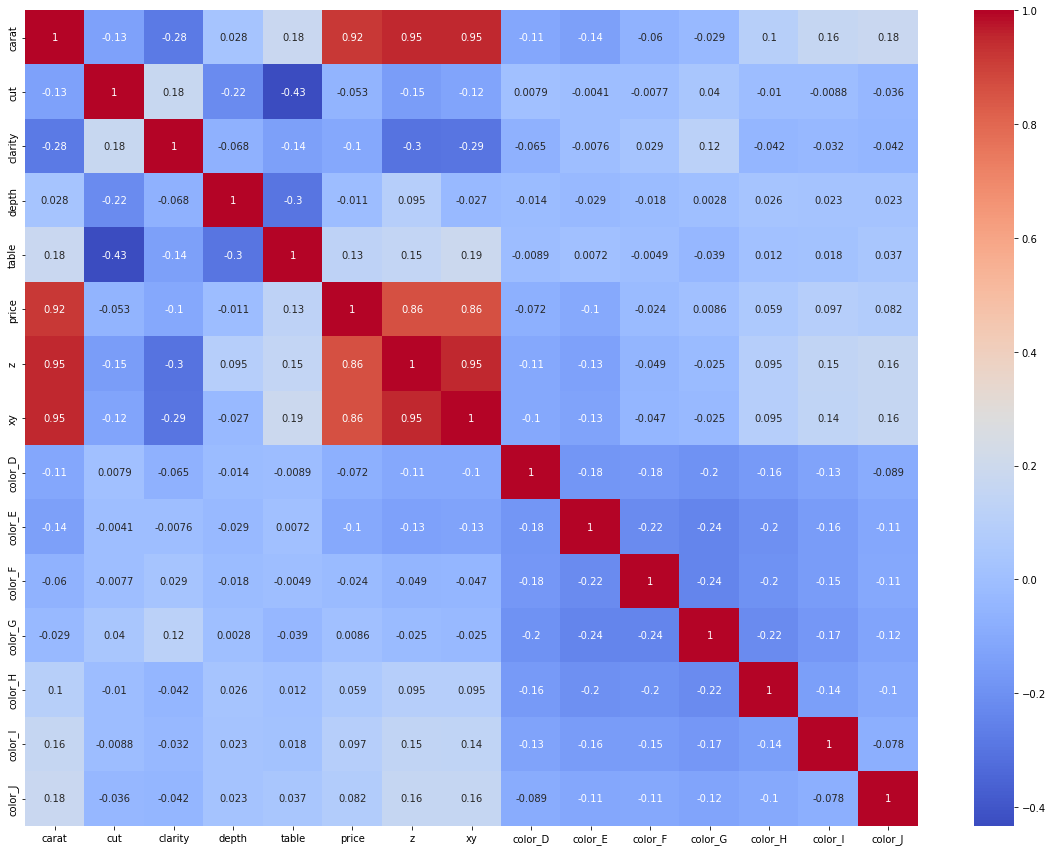

In [13]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap='coolwarm', annot=True)
plt.show()

# 1-3

Pair plot

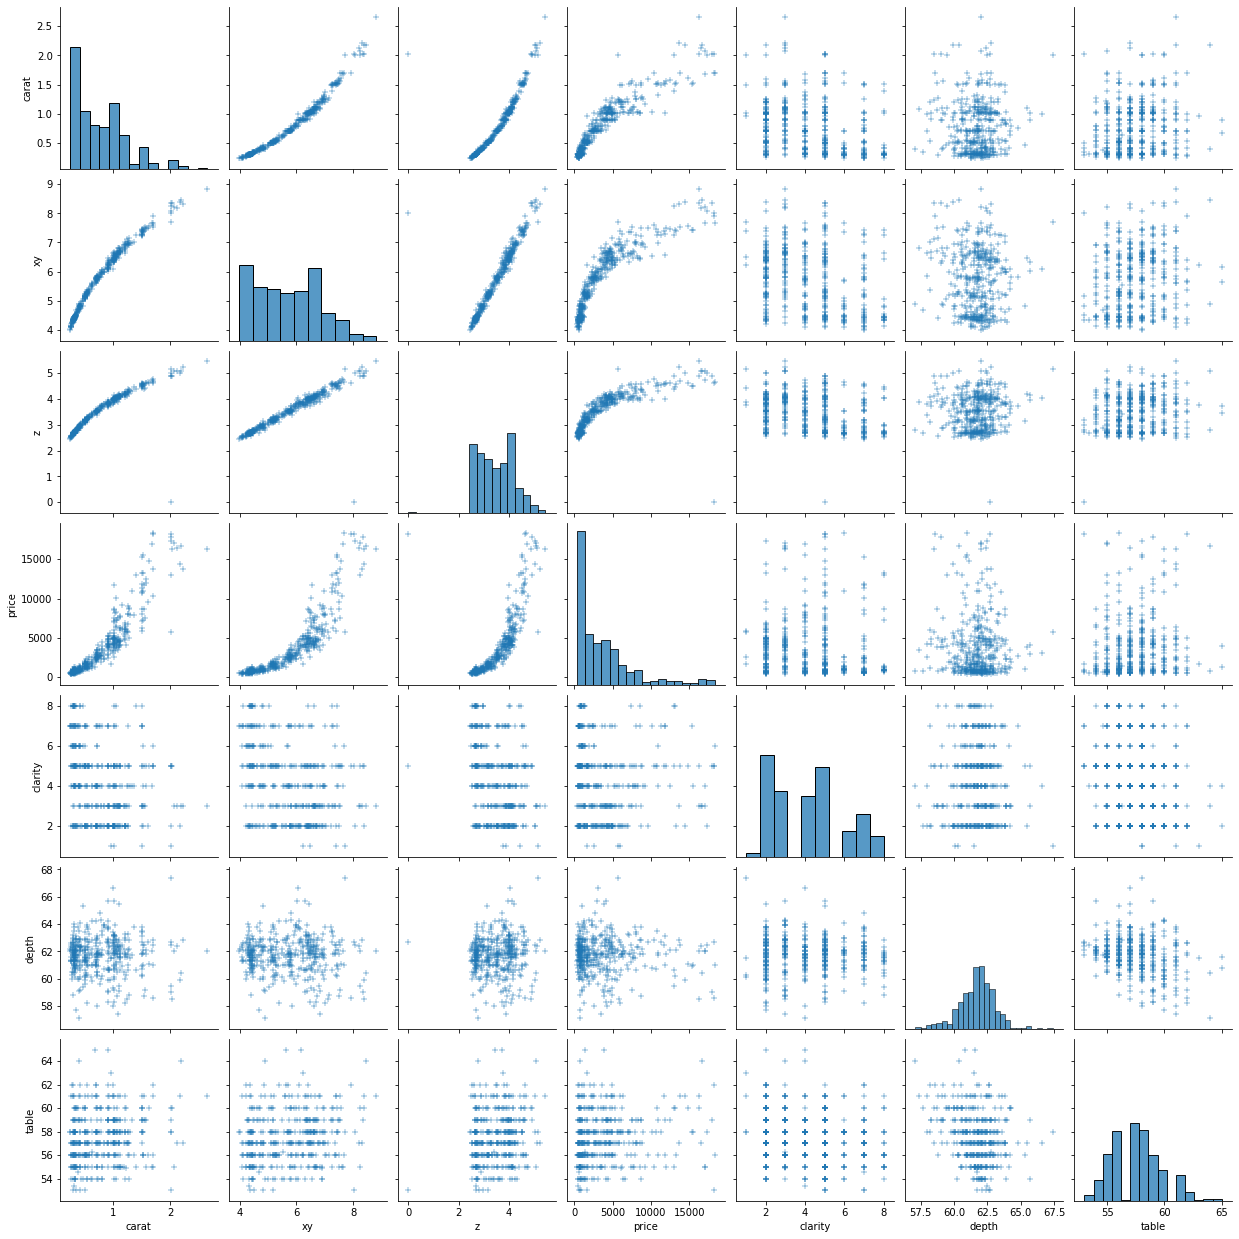

In [14]:
correlated_columns = ['carat', 'xy', 'z', 'price']
other_columns = ['clarity', 'depth', 'table']
cols = correlated_columns + other_columns
data_to_be_pairplotted = data[cols].sample(400)
# could've also specified hue
graph = sns.pairplot(data_to_be_pairplotted, markers='+')
plt.show()

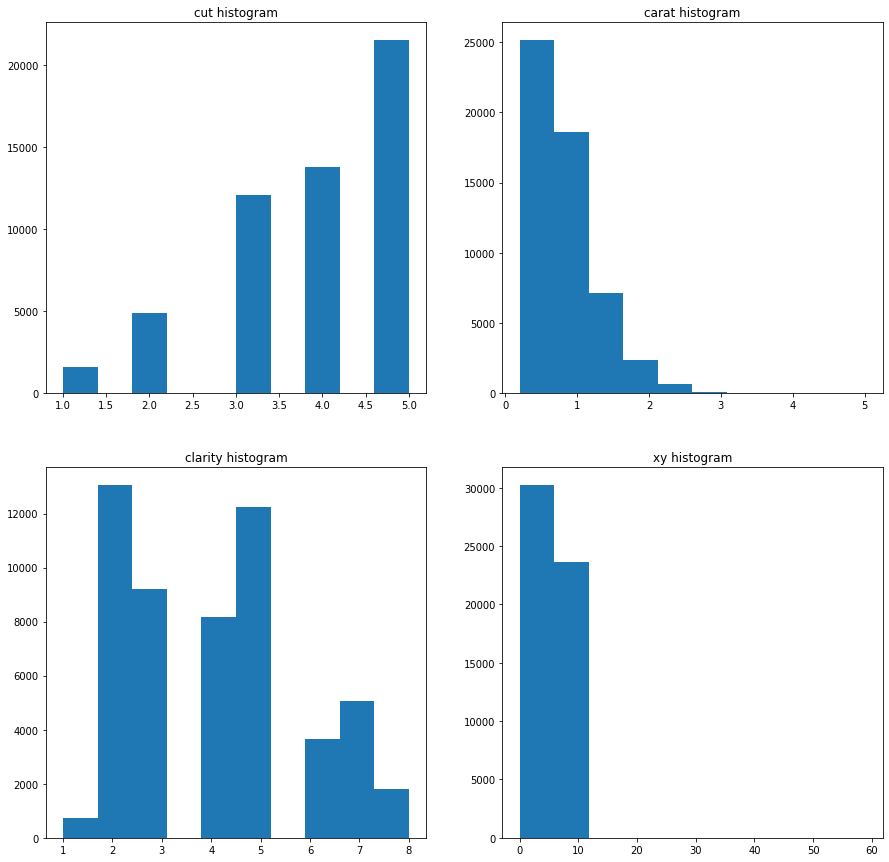

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))
indices = [(i,j) for i in range(2) for j in range(2)]
for col, i in zip(['cut', 'carat', 'clarity', 'xy'], indices):
    axs[i].hist(data[col])
    axs[i].set_title(col + ' histogram')
plt.show()

In [16]:
# could've also plotted scatter plots

# 1-4 Diamond Price Prediction

The problem: predicting price of a diamond

In [17]:
# split data between features and target

def split_feature_target(data, label):
    features = data.drop(label, axis=1)
    target = data[label]
    return features, target
features, target = split_feature_target(data, 'price')

## Scaling the data

In [18]:
# scale data
# could've also used StandardScaler

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
features_scaled = pd.DataFrame(minmax.fit_transform(features))
features_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.006237,1.00,0.285714,0.513889,0.230769,0.076415,0.067572,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.002079,0.75,0.142857,0.466667,0.346154,0.072642,0.066044,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.25,0.428571,0.386111,0.423077,0.072642,0.069100,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.018711,0.75,0.571429,0.538889,0.288462,0.082704,0.071817,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.022869,0.25,0.285714,0.563889,0.288462,0.086478,0.073854,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.108108,1.00,0.142857,0.494444,0.269231,0.110063,0.097793,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53936,0.108108,0.25,0.142857,0.558333,0.230769,0.113522,0.097623,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53937,0.103950,0.50,0.142857,0.550000,0.326923,0.111950,0.096435,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53938,0.137214,0.75,0.285714,0.500000,0.288462,0.117610,0.104414,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
# split data between train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size = 0.20, random_state = 1234)

## Linear Regression

In [20]:
X = np.array(X_train)

# append a column of ones
# X = np.hstack((X, np.ones(shape=(len(X),1))))

y = y_train

In [21]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)
# r2 score
linreg_score = linreg.score(X_test, y_test)

linreg_score

0.8960890499512355

## KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor

N = 10
scores = np.zeros(shape=(N+1,1))
for n in range(1,N+1):
    knr = KNeighborsRegressor(n_neighbors=n)
    knr.fit(X_train, y_train)
    scores[n] = knr.score(X_test, y_test)

In [23]:
scores

array([[0.        ],
       [0.95575008],
       [0.96233986],
       [0.96380627],
       [0.96401162],
       [0.96357884],
       [0.9622135 ],
       [0.96102828],
       [0.95998639],
       [0.95882134],
       [0.95729142]])

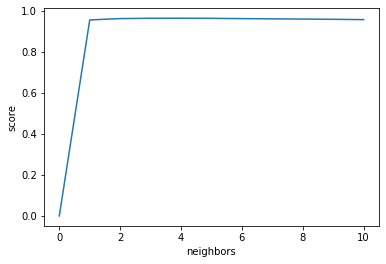

In [24]:
plt.ylabel('score')
plt.xlabel('neighbors')
plt.plot(np.arange(0, N+1), scores)
plt.show()

In [25]:
i = np.argmax(scores)
print(f'chose neighbors={i} as hyperparamter')
print('score:', scores[i])

chose neighbors=4 as hyperparamter
score: [0.96401162]


## Lasso

In [26]:
from sklearn.linear_model import Lasso

N = 40
x = N//2
for step in [2, 1, 0.5, 0.1]:
    scores = np.zeros(N)
    begin = max(int(x - N/4*step), 0)
    end = min(int(x + N/4*step), N)
    
    alpha_list = np.arange(begin, end, step)
    for i,alpha in enumerate(alpha_list):
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)
        scores[i] = lasso.score(X_test, y_test)
    
    print('scores:', [round(x, 4) for x in set(scores)])
    i = np.argmax(scores)
    x = alpha_list[i]
    print('x:', x, 'score: ', scores[i])

scores: [0.8961, 0.893, 0.8924, 0.8928, 0.8918, 0.8911, 0.8902, 0.8891, 0.888, 0.8866, 0.8713, 0.0, 0.876, 0.8801, 0.8737, 0.8688, 0.8819, 0.8781, 0.8662, 0.8852, 0.8836]
x: 0 score:  0.8961183853030867
scores: [0.8961, 0.8933, 0.893, 0.8929, 0.8928, 0.8926, 0.8924, 0.8921, 0.8918, 0.8914, 0.0]
x: 0 score:  0.8961183853030867
scores: [0.8961, 0.8949, 0.8931, 0.8933, 0.893, 0.893, 0.8929, 0.8929, 0.8928, 0.8927, 0.0]
x: 0.0 score:  0.8961183853030867
scores: [0.8961, 0.896, 0.8955, 0.8957, 0.8952, 0.8949, 0.8945, 0.8941, 0.8938, 0.8935, 0.0]
x: 0.0 score:  0.8961183853030867


The best value of alpha=0 implies Lasso is no better than linear reggression

## Random Forest

## SVM Regressor

In [27]:
# from sklearn.svm import SVR

# kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# scores = np.zeros(len(kernels))

# for i, kernel in enumerate(kernels):
#     model = SVR(kernel=kernel)
#     model.fit(X_train, y_train)
#     scores[i] = model.score(X_test, y_test)

# best = np.argmax(scores)
# best_kernel = kernels[best]
# best_score = scores[best]

# print(f'used kernel of {kernel} with the score of {best_score}')

# 1-5 Implementing KNN

In [68]:
def knn(train, test):
    k = 3
    
    train = train.to_numpy()
    test = test.to_numpy()
    
    nearest = np.zeros((len(test), len(train)))
    for i,x in enumerate(test):
        d = train - x
        nearest[i, :] = np.argpartition((d**2).sum(axis=1), k)

    return train[]

knn(X_train, X_test)

array([[3.2549e+04, 1.0235e+04, 2.4013e+04, ..., 5.0000e+00, 4.0000e+00,
        2.1575e+04],
       [8.8320e+03, 2.9507e+04, 8.2080e+03, ..., 4.3149e+04, 2.0000e+00,
        4.3151e+04],
       [4.2976e+04, 4.1782e+04, 2.3982e+04, ..., 4.3149e+04, 5.0000e+00,
        0.0000e+00],
       ...,
       [1.0526e+04, 2.9320e+03, 4.2098e+04, ..., 5.0000e+00, 4.0000e+00,
        2.1575e+04],
       [5.8380e+03, 1.3672e+04, 2.7630e+03, ..., 4.3149e+04, 4.3150e+04,
        4.3151e+04],
       [2.4144e+04, 2.5108e+04, 1.8309e+04, ..., 5.0000e+00, 4.0000e+00,
        2.1575e+04]])

In [62]:
t = X_test.to_numpy()[0]
d = X_train.to_numpy() - t
d

array([[ 0.20790021, -0.5       , -0.28571429, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20997921, -0.25      ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.16008316,  0.        , -0.14285714, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.37006237,  0.        , -0.14285714, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.02702703, -0.25      ,  0.14285714, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37629938, -0.25      ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
z = (d * d)
z

array([[4.32224964e-02, 2.50000000e-01, 8.16326531e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.40912686e-02, 6.25000000e-02, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.56266181e-02, 0.00000000e+00, 2.04081633e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.36946158e-01, 0.00000000e+00, 2.04081633e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.30460190e-04, 6.25000000e-02, 2.04081633e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.41601221e-01, 6.25000000e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [74]:
x = np.random.randint(30,size=(4,5))
x

array([[26,  9,  3, 28, 26],
       [28, 10,  4,  1, 26],
       [ 4, 17, 12, 18, 18],
       [10,  2, 12, 16,  6]])

In [76]:
y = np.array([
    [2,3],
    [0,1],
    [2,1],
    [3,0]
])
y

array([[2, 3],
       [0, 1],
       [2, 1],
       [3, 0]])

In [83]:
np.apply(lambda x : x*2, a)

AttributeError: module 'numpy' has no attribute 'apply'

# 1-8 Bootstrap

In [28]:
# # resample data

# # train data
# # could've also used sci-kit resample
# boot_data = data.sample(frac=0.2, replace=True, random_state=1234)

# # test data:
# included = list(set(boot_data.index))
# not_included = [i for i in range(len(data)) if i not in included]
# other_data = data.iloc[not_included]

use a model on the bootstrapped data

In [29]:
iterations = 23

def resample(data, target):
    # train
    train = data.sample(frac=0.2, replace=True)
    # test
    included = train.index
    not_included = np.setdiff1d(np.arange(len(data)), included, assume_unique=False)
    test = data.iloc[not_included]

    return train, target.iloc[included], test, target.iloc[not_included]

scores = np.zeros(iterations)

for i in range(iterations):
    X, y, X_test, y_test = resample(features_scaled, data['price'])
    reg = LinearRegression()
    reg.fit(X,y)
    scores[i] = reg.score(X_test, y_test)
    print(f'iteration: {i}, score: {scores[i]}')

print(f'mean score: {scores.mean()}')

bootstrap_score = scores.mean()

print(f"using bootstrap makes the score {'better' if bootstrap_score > linreg_score else 'worse'}")

iteration: 0, score: 0.8920766665049324
iteration: 1, score: 0.8936857533720335
iteration: 2, score: 0.8939819063411557
iteration: 3, score: 0.8960773938620844
iteration: 4, score: 0.8946360065890068
iteration: 5, score: 0.8935413348828921
iteration: 6, score: 0.8912305844618603
iteration: 7, score: 0.8942280040858835
iteration: 8, score: 0.8941403425992005
iteration: 9, score: 0.8939622572546535
iteration: 10, score: 0.8935421256123237
iteration: 11, score: 0.895094331034368
iteration: 12, score: 0.8905851277776891
iteration: 13, score: 0.8950063165167201
iteration: 14, score: 0.888740505070722
iteration: 15, score: 0.8953612972957082
iteration: 16, score: 0.894314706919678
iteration: 17, score: 0.8938916220163362
iteration: 18, score: 0.8961962685364703
iteration: 19, score: 0.8938886998167485
iteration: 20, score: 0.8938742128526318
iteration: 21, score: 0.8931060439803645
iteration: 22, score: 0.8923211875978162
iteration: 23, score: 0.8942744250860676
iteration: 24, score: 0.89530

# Feature Selection 

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score

# forward

knn = KNeighborsRegressor(n_neighbors=5)
forward_sfs = SequentialFeatureSelector(knn, direction='forward')
x_train_forward = forward_sfs.fit_transform(X=X_train, y=y_train)
print('Shape of forward feature selected data:', x_train_forward.shape)
print('forward feature selected:', forward_sfs.get_feature_names_out()) 


In [ ]:

selected_features = forward_sfs.get_support()
features_list = []

for idx,f in enumerate(selected_features):
    if f:
        features_list.append(idx)

x_test_forward = np.delete(X_test, features_list, axis=1)


knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_forward, y_train)
y_pred = knn.predict(x_test_forward)
knn_accuracy_forward = r2_score(y_test, y_pred)*100
print('KNN accuracy on forward selected data is',knn_accuracy_forward)

# 1-9 Lasso Ridge

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

alpha = 1
print(f'set alpha: {alpha}')

ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)

print('lr:', lr_score)
print('ridge:', ridge_score)
print('lasso:', lasso_score)

better, worse = 'lasso', 'ridge'
if ridge_score > lasso_score:
    better, worse = worse, better
print(f'{better} performed better than {worse}')

In [84]:
! echo HI

HI


In [ ]:
! pip3 install 